<a href="https://colab.research.google.com/github/Carlos-39/KerasTensorFlow-Platzi/blob/main/CursoKerasTensorFlow_Platzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando nuestro propio Churn Analysis 🤓📊

Se va a entrenar una red neuronal para analizar que tan probable es que un cliente deje la empresa o los servicios de esta en un futuro, tambien llamado churn.

* "churn" se refiere a la tasa de cancelación o rotación de clientes, es decir, la cantidad de clientes que dejan de utilizar un producto o servicio durante un periodo determinado

En este lab aprenderás:

* [Tensorflow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)
* Descargar un dataset, prepararlo, entrenarlo, realizar finetuning y guardarlo.

#1. Descargar dataset

In [ ]:
# Install the Kaggle API

!pip install -q kaggle

In [ ]:
# Upload your kaggle.json file -> personal token

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josemanuelpalma","key":"09aefccb5104e5e18f032c70726d0d6e"}'}

In [ ]:
# Set the correct file path and permissions

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Ver el dataset que se necesite directamente desde kaggle

!kaggle datasets list -s customer-churn

ref                                                      title                                            size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
blastchar/telco-customer-churn                           Telco Customer Churn                           175758  2018-02-23 18:20:00.210000         322108       2966  0.88235295       
barun2104/telecom-churn                                  Customer Churn                                  46575  2020-03-23 16:30:13.047000          15294        145  0.9411765        
radheshyamkollipara/bank-customer-churn                  Bank Customer Churn                            314688  2023-04-28 16:32:01.277000          22233        191  1.0              
muhammadshahidazeem/customer-churn-dataset               Customer Churn Dataset 

In [ ]:
#Descargar el dataset de Kaggle de url: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Descomprimir el zip en el que viene el dataset
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
# TensorFlow ya viene en google colab pero si se quiere instalar de todos modos es:
!pip install tensorflow

#2. Instalación de las dependencias y preparacion de dataset

In [ ]:
#Para generar reportes
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c3c89e174aeaf83a9d9a589d6c30659d9530779d7747bfec98ee289358c73a21
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Librerias habituales
import joblib
import pandas as pd # Para manipular DataFrames de manera eficiente.
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf # Aunque es más conocido por las redes neuronales, en esta etapa lo prepararemos para su uso posterior.
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Para métricas y transformaciones de datos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## 2.1 Explorar Dataset

Con esta preparacion de dataset el modelo se basara para predecir si ese cliente va a abandonar o no el servicio, pero tambien sirve para muchas cosas mas este preprocesamiento de datos:

* Con los datos preparados y procesados, estamos listos para construir modelos predictivos. Esta información también es valiosa para:

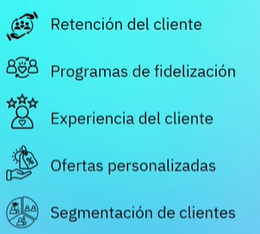

* Esta preparación no solo fortalece la predicción del abandono de clientes, sino que también amplía las estrategias comerciales de la compañía.

In [ ]:
!ls

kaggle.json  sample_data  telco-customer-churn.zip  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
# Leer los datos -> siempre definir de manera explicita el separador
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=",")

* Tip para visualizar todas las columnas del dataframe

In [ ]:
# mostrar los primeros 3 elementos
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [ ]:
# si quiero ver todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
# Y si se vuelve a recargar ya se vera todas las columnas
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  
2              Yes      Mailed check           53.85       108.15   Yes

## 2.2 Analisis exploratorio de datos (EDA)
Es para ver en detalle alguna columna o fila o algo especifico

In [ ]:
# Funcion que permite hacer un resumen utilizando funciones nativas de panda -> muestra el resumen de cada categoria que esta en el dataset
def summarize_dataframe_with_pandas(df):
    summary = df.describe(include='all').T # Descripcion general
    summary['Type'] = df.dtypes #Tipos de datos
    summary['Unique Values'] = df.nunique() # Cantidad de valores unicos
    summary['Examples'] = df.apply(lambda col: col.dropna().unique()[:3]) # Ejemplo de valores

    # Reorganizar columnas para mejor visualizacion
    summary = summary[['Type', 'Unique Values', 'Examples']]

    return summary

In [ ]:
# Generar resumen para este dataframe
summarize_dataframe_with_pandas(df)

Type  Unique Values  \
customerID         object           7043   
gender             object              2   
SeniorCitizen       int64              2   
Partner            object              2   
Dependents         object              2   
tenure              int64             73   
PhoneService       object              2   
MultipleLines      object              3   
InternetService    object              3   
OnlineSecurity     object              3   
OnlineBackup       object              3   
DeviceProtection   object              3   
TechSupport        object              3   
StreamingTV        object              3   
StreamingMovies    object              3   
Contract           object              3   
PaperlessBilling   object              2   
PaymentMethod      object              4   
MonthlyCharges    float64           1585   
TotalCharges       object           6531   
Churn              object              2   

                                                           Examples  
customerID                     [7590-VHVEG, 5575-GNVDE, 3668-QPYBK]  
gender                                               [Female, Male]  
SeniorCitizen                                                [0, 1]  
Partner                                                   [Yes, No]  
Dependents                                                [No, Yes]  
tenure                                                   [1, 34, 2]  
PhoneService                                              [No, Yes]  
MultipleLines                           [No phone service, No, Yes]  
InternetService                              [DSL, Fiber optic, No]  
OnlineSecurity                       [No, Yes, No internet service]  
OnlineBackup                         [Yes, No, No internet service]  
DeviceProtection                     [No, Yes, No internet service]  
TechSupport                          [No, Yes, No internet service]  
StreamingTV                          [No, Yes, No internet service]  
StreamingMovies                      [No, Yes, No internet service]  
Contract                       [Month-to-month, One year, Two year]  
PaperlessBilling                                          [Yes, No]  
PaymentMethod     [Electronic check, Mailed check, Bank transfer...  
MonthlyCharges                                [29.85, 56.95, 53.85]  
TotalCharges                                [29.85, 1889.5, 108.15]  
Churn                                                     [No, Yes]

In [ ]:
# Para una visualizacion mas detallada e interactiva de esto:
from ydata_profiling import ProfileReport # Para generar reportes automáticos que nos ayuden a entender mejor nuestros datos.
profile = ProfileReport(df, minimal = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 14.07it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.3 Valores unicos

In [ ]:
# Eliminar columnas con valores unicos que no aportan nada a la red - en este caso la columna de customerID
df = df.drop('customerID', axis=1)

In [ ]:
# Eliminar columna con la que se puede generar bias o sesgo - en este caso el genero
df = df.drop('gender', axis=1)

## 2.4 Valores faltantes

In [ ]:
# Evaluar cantidad de valores faltantes
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2.5 Columnas categoricas

In [ ]:
# Reemplazo de valores binarios en columnas categoricas

# Evitar warning por uso de replace
pd.set_option('future.no_silent_downcasting', True)

# Se quiere hacer cambiar el yes por el 1 y el no por el 0
categorical_columns = list(df.select_dtypes(include=['O']).keys())

for i in categorical_columns:
    df[i] = df[i].replace('Yes', 1)
    df[i] = df[i].replace('No', 0)

Label Encoder -> permite cuando tenemos categorias con valores como por ejemplo, no-si-NointernetService, ahora se puede llevar a 0,1 y 2

In [ ]:
# Inicializar y aplicar LabelEncoder Unico
label_encoders = {}

for col in categorical_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str)) # Codificar las columnas categoricas
  label_encoders[col] = le # Guardar el codificador unico para cada columna

In [ ]:
# Guardar los label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
# Observar resultado
df.head(3)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              2   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              2           29.85          1675      0  
1              3           56.95           520      0  
2              3           53.85           635      1

## 2.6 Columnas Numericas

In [ ]:
# Escalar la data -> Si yo tengo un rango para determinar la columna de [0,1000], lo puedo llevar de [0,1]

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [ ]:
# Guardar el escalado de datos
joblib.dump(scale, 'scale.pkl')

['scale.pkl']

Nos sirve guardar el escalado y el labelEncoder porque el dia de mañana cuando llegue un dato nuevo, hay que preprocesar ese dato para que tenga el mismo formato

In [ ]:
# Ver resultado de este EDA
df.head(3)

SeniorCitizen  Partner  Dependents    tenure  PhoneService  MultipleLines  \
0              0        1           0  0.013889             0              2   
1              0        0           0  0.472222             1              0   
2              0        0           0  0.027778             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            0            0                0         0                 1   
1            0            0                0         1                 0   
2            0            0                0         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              2        0.115423      0.256508      0  
1              3        0.385075      0.079632      0  
2              3        0.354229      0.097243      1

# Bonus: Desbalanceo de datos

El desbalanceo de datos es un fenomeno que ocurre cuando una clase en un conjunto de datos tiene significativamente mas ejemplos que otra. Esto es comun en proyectos como la preddicon de churn, donde los clientes que se van son mucho menos de los que se quedan.

- Si el 95% de los clientes no se van y solo el 5% si lo hace, el modelo podria aprender a predecir siempre que nadie se va. Aunque esto podria parecer preciso, en realidad no esta resolviendo el problema que nos interesa.

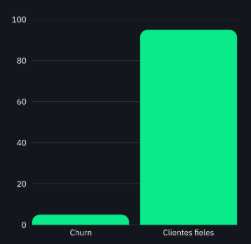

- Este sesgo hacia la clase mayoritaria afecta la performance del modelo y puede llevar a desiciones erroneas.

- Si ignoramos este problema de desbalanceo, nuestro modelo podria etiquetar incorrectamente a la clase minoritaria, que a menudo es la clase mas critica.

### Tecnicas para balancear datos

1. Submuestreo de la clase mayoritaria:

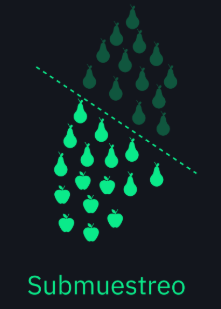

Esto implica reducir el numero de ejemplos de la clase mayoritaria para equilibrarel conjunto de datos.

- Aunque esto puede acelerar el entrenamiento del modelo, tambien puede llevar a la perdida de informacion valiosa.

- Si estamos analizando transacciones bancarias y la mayoria son legitimas, podriamos eliminar algunas de estas transacciones para equilibrar el conjunto de datos. Sin embargo, esto podria significar que perdemos patrones importantes en las transacciones legitimas.

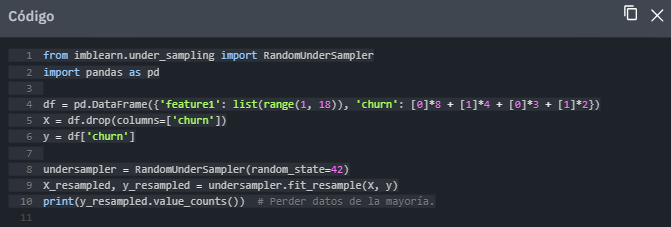

- El código equilibra un conjunto de datos desbalanceado reduciendo la cantidad de ejemplos en la clase más numerosa. Se genera un conjunto de datos con valores de entrada y etiquetas, donde una de las categorías tiene más ocurrencias que la otra. Luego, se ajusta el conjunto eliminando registros de la clase predominante para igualar la distribución. Finalmente, se muestra cómo queda la proporción de etiquetas después del ajuste, resaltando que este proceso implica pérdida de información de la clase con más registros.

2. Otra técnica es el sobremuestreo de la clase minoritaria. Aquí, duplicamos o sintetizamos datos de la clase minoritaria para igualar el número de ejemplos de la clase mayoritaria. Esto mantiene la información original, pero también puede producir overfitting.

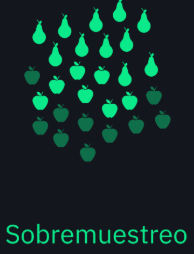

- Si tenemos un conjunto de datos de diagnósticos médicos, donde las enfermedades raras están subrepresentadas. Podríamos duplicar los registros de estas enfermedades para asegurarnos de que el modelo las reconozca mejor.

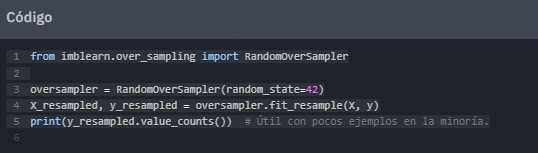

- El código equilibra un conjunto de datos desbalanceado aumentando la cantidad de ejemplos en la clase con menor representación.

- Se generan nuevas copias de los registros menos frecuentes para igualar la distribución. Luego, se muestra la proporción de etiquetas después del ajuste.

- Aunque útil en conjuntos con pocos casos en la clase minoritaria, este proceso puede generar redundancia y aumentar el riesgo de sobreajuste.

3. Una técnica más avanzada es SMOTE, o Synthetic Minority Over-sampling Technique.

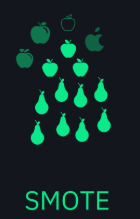

- En lugar de duplicar datos existentes, SMOTE genera ejemplos sintéticos para la clase minoritaria. Esto añade datos nuevos sin repetir registros, aunque existe el riesgo de crear datos irreales.

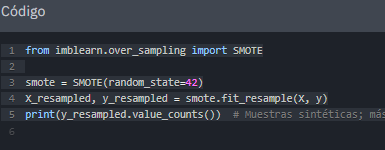

* link de ahi: # Muestras sintéticas; más info en [esta guía visual](https://medium.com/towards-data-science/class-imbalance-strategies-a-visual-guide-with-code-8bc8fae71e1a).

- El código equilibra un conjunto de datos desbalanceado generando nuevos registros en la clase minoritaria en lugar de duplicar los existentes. Esto mejora la representación sin redundancia.

Finalmente, se muestra la distribución de etiquetas después del ajuste, aunque es clave verificar que los datos sintéticos no introduzcan sesgos.

4. Ponderacion de clases

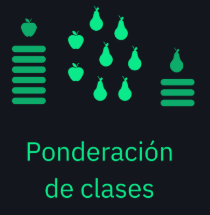

- En lugar de modificar el conjunto de datos, ajustamos los pesos de las clases en el modelo. Esto es especialmente útil para modelos como redes neuronales, donde podemos penalizar más los errores en la clase minoritaria.

- Por ejemplo, si estamos entrenando un modelo para detectar fraudes, podríamos asignar un peso mayor a los casos de fraude. Esto le indica al modelo que estos errores son más costosos y deben ser minimizados.

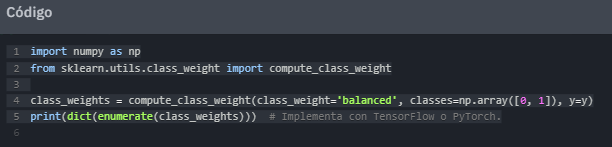

- El código calcula pesos para ajustar el impacto de cada clase en un conjunto desbalanceado. Se asignan valores mayores a la clase minoritaria para equilibrar su influencia. Luego, los pesos obtenidos se imprimen y pueden utilizarse en modelos de aprendizaje profundo.

El equilibrio de clases es clave para mejorar el rendimiento de los modelos en datos desbalanceados. Cada una de las técnicas es más o menos pertinente en su contexto.

Ejemplo en un NB: https://colab.research.google.com/drive/1kbWC-oINc9aYJc4tSL4JEW3Kza8cbpE0?usp=sharing

#3. Entrenamiento

In [ ]:
# dividir las columnas -> y es la columna objetivo que es la de churn - x es lo restante
x = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
# Separacion de los datos, 20% test 80% train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

print(xtrain.shape, ytrain.shape) # Datos de entrenamiento
print(xtest.shape, ytest.shape) # Datos de prueba

(5634, 18) (5634,)
(1409, 18) (1409,)


# 4. Red Neuronal con ajustes manuales

In [ ]:
# Numero de columnas de entrenamiento, las entradas basicamente, son 18 columnas, entonces hay 18 entradas
num_columns = 18

Red Neuronal con Dropout

In [ ]:
# Generar la red de forma secuencial, es decir, construir la red capa por capa, una por una
model = keras.Sequential([
    keras.layers.Input(shape=(num_columns,)), #Capa de entrada con 18 caracteristicas (neuronas)
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'), #Primera capa oculta con 16 neuronas
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'), #Capa de salida con una neurona
])

# La capa Dense es una capa totalmente conectada que tiene relacion con las neuronas anteriores y las siguientes
# Se añaden dos capas de dropout con el 30% de neuronas desactivadas, los valores de Dropout varian entre 0.1 y 0.5, siendo 0.5 muy agresivo

Red neuronal con regularizacion L1, L2, y L1 + L2

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
# Generar la red de forma secuencial, es decir, construir la red capa por capa, una por una
model = keras.Sequential([
    keras.layers.Input(shape=(num_columns,)), #Capa de entrada con 18 caracteristicas (neuronas)
    keras.layers.Dense(num_columns, activation='relu', kernel_regularizer=regularizers.l1(0.01)), # Primera capa oculta con 18 neuronas y con regularizador L1
    keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)), # Segunda capa oculta con 16 neuronas y con regularizador L2
    keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.1)), # Tercera capa oculta con 10 neuronas y con regularizador L1 + L2
    keras.layers.Dense(1, activation='sigmoid'), #Capa de salida con una neurona
])

# La capa Dense es una capa totalmente conectada que tiene relacion con las neuronas anteriores y las siguientes

Por qué 16 neuronas?:

* Entrada: El modelo usa 18 caracteristicas.
* 16 neuronas: Elegido por ser cercano al numero de caracteristicas, siguiendo buenas practicas iniciales.
* Balance: Simple, funcional, y eficiente para el entrenamiento rapido.
* Base ajustable: Diseñado para optimizacion futura para herramientas como KerasTurner.

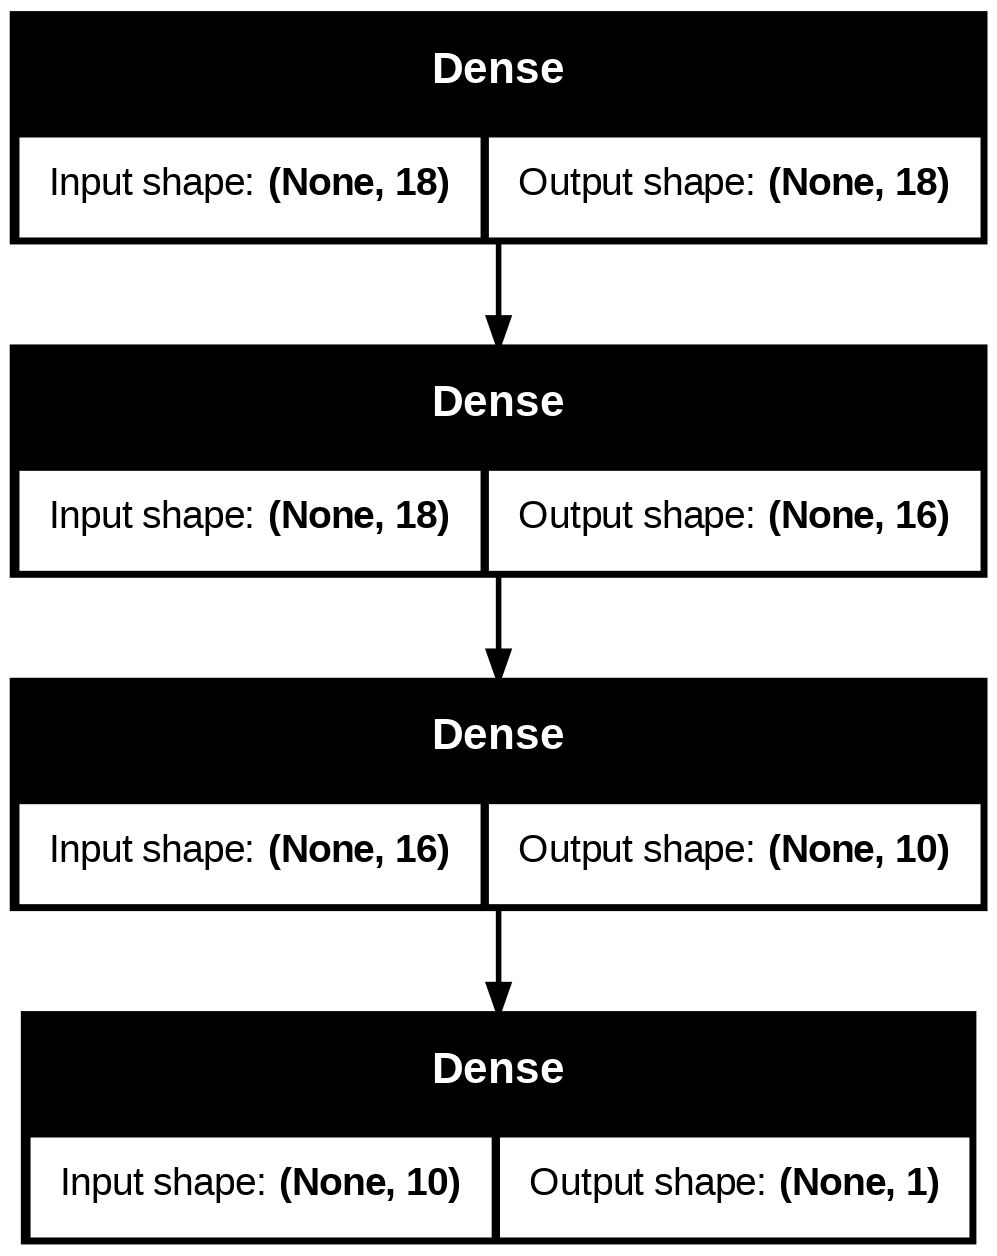

In [ ]:
# Grafica de la arquitectura
keras.utils.plot_model(model, show_shapes=True)

### ¿Cómo seleccionar una función de pérdida adecuada?

Elegir una función de pérdida incorrecta al entrenar un modelo de aprendizaje automático es similar a llevar una vestimenta inadecuada para una actividad específica: puede llevarte a un resultado poco óptimo.

- La función de pérdida evalúa la diferencia entre las predicciones del modelo y los resultados reales, buscando minimizar esta discrepancia. Esta selección varía en función del problema a resolver, ya sea de clasificación o de regresión.

--------------------------------------------------
####¿Qué función utilizar para problemas de regresión?
En problemas de regresión, donde buscamos predecir valores continuos, se utiliza comúnmente el error cuadrático medio (Mean Squared Error, MSE). Esta función calcula el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales, ponderando los errores más grandes de manera exponencial.

--------------------------------------------------
####¿Cuál es la función de pérdida para clasificación binaria?
En un contexto de clasificación binaria, donde categorizamos entradas en una de dos clases, la elección apropiada es Binary Cross Entropy. Esta función mide la disimilaridad entre dos distribuciones de probabilidad: las predicciones del modelo y las observaciones reales. Implementar esta función en el entrenamiento proporciona un gráfico en el que las ordenadas representan la pérdida, mientras que las abscisas indican las iteraciones o epochs. La tendencia ideal es observar una disminución de la pérdida a medida que avanzan los epochs.

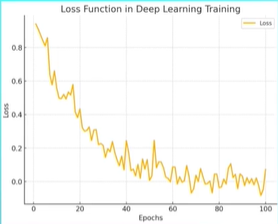

In [ ]:
# Para implementar la Loss function y varias cosas mas se debe pasar como un argumento en el compilador
model.compile(
    optimizer = 'adamW', # optimizador adamW
    loss = 'binary_crossentropy', # en este caso es la mejor loss function
    metrics = ['accuracy'] # Ver como evoluciona el accuracy en cada epoch
    )

# Obs: El compilador recibe loss functions, funciones de optimizacion y metricas, etc

In [ ]:
# Agregar el Early Stoppong (explicado mas adelante)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# se necesita la variable a monitorear, paciencia significa que para determinado valor de loss (valor a monitorear) si no mejora en 5 epochs, se corta el proceso, devolvemos tambien los mejores pesos a lo largo del entrenamiento.

In [ ]:
# Probamos con 50 epochs para que entrene la red neuronal
history = model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5721 - loss: 2.5738 - val_accuracy: 0.7339 - val_loss: 1.4423
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7365 - loss: 1.2311 - val_accuracy: 0.7339 - val_loss: 0.8119
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7311 - loss: 0.7449 - val_accuracy: 0.7339 - val_loss: 0.6238
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7288 - loss: 0.6029 - val_accuracy: 0.7339 - val_loss: 0.5737
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7373 - loss: 0.5581 - val_accuracy: 0.7339 - val_loss: 0.5549
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7288 - loss: 0.5516 - val_accuracy: 0.7339 - val_loss: 0.5459
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7323 - loss: 0.5426 - val_accuracy: 0.7339 - val_loss: 0.5389
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7405 - loss: 0.5316 - val_accuracy: 0.

* Durante el entrenamiento del modelo, no basta con observar únicamente la disminución de la función de pérdida. Es crucial incorporar métricas que evalúen la precisión y el rendimiento general del modelo. Las métricas proporcionan una visión más detallada sobre si el modelo realmente está aprendiendo de manera efectiva o si sólo está ajustándose a los datos de entrenamiento.

* Se fija que el early stopping si hizo su tarea correctamente, el valor mas bajo fue en el epoch 1, y ahi tiene paciencia 5, y como no mejoro, corto el proceso.

### Bonus: Aceleracion de entrenamientocon GPU y TPU en Google Colab

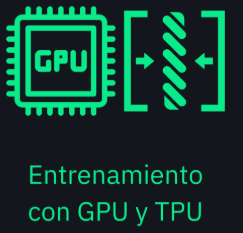

Entrenar modelos de Deep Learning puede ser un proceso demandante, tanto en términos de tiempo como de recursos computacionales. Aquí es donde las GPU y TPU entran en juego.
- Estas unidades están diseñadas para manejar cálculos intensivos de manera más eficiente que las CPU tradicionales.

- Las CPU son versátiles y aptas para tareas generales. Aunque pueden entrenar modelos, son más lentas que las GPU debido a su menor capacidad de paralelización.

- Las GPU están diseñadas específicamente para realizar operaciones en paralelo. Esto las hace ideales para el procesamiento gráfico, pero también son muy útiles en el entrenamiento de modelos de Deep Learning.

- Las TPU, o Unidades de Procesamiento Tensorial, desarrolladas por Google, están optimizadas para operaciones con tensores que son fundamentales en el aprendizaje profundo. Al entrenar un modelo NLP con una arquitectura moderna como transformers, las TPU pueden acelerar el proceso de entrenamiento de manera notable.

- Google Colab procesará por defecto con una CPU, pero tú puedes cambiar el procesador según tus necesidades. Para activar la GPU T4 de forma gratuita, vas al menú de editar, configuración del notebook, y la seleccionas.

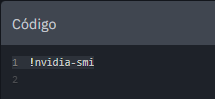

- Este comando en bash, !nvidia-smi, se utiliza para verificar la disponibilidad de GPUs NVIDIA en el sistema. Al ejecutarlo, se muestra una tabla detallada con información sobre las GPUs disponibles, incluyendo su memoria, temperatura y uso actual. Si ves esta tabla, significa que tienes una GPU lista para ser utilizada.

- Para activar una TPU el procedimiento es el mismo. Vas al menú editar, configuración del notebook y la seleccionas. Al igual que con las GPU, hay una opción gratuita y una de pago.

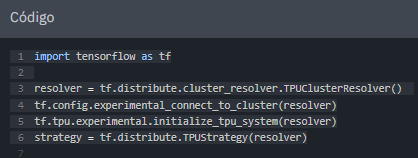

- Este proceso inicializa un sistema TPU en TensorFlow para optimizar la ejecución de modelos de aprendizaje automático. Primero, se detecta y conecta el entorno al clúster TPU disponible. Luego, se configura el sistema para distribuir eficientemente las operaciones entre los núcleos de procesamiento, asegurando un mejor rendimiento en tareas intensivas de cálculo.

* Una vez que hayas activado la TPU, es importante ajustar el tamaño del batch para optimizar su rendimiento.

* Las TPU están diseñadas para trabajar con batches grandes. Si utilizas un batch pequeño, podrías experimentar inestabilidad numérica.

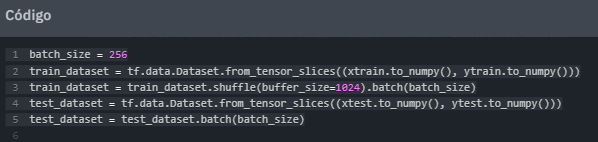

Este proceso transforma los datos de entrenamiento y prueba en conjuntos optimizados para TensorFlow. Se establecen lotes de tamaño definido para mejorar la eficiencia del procesamiento y se aplica una mezcla aleatoria a los datos de entrenamiento, evitando sesgos en el aprendizaje. Esto facilita la manipulación y el flujo de datos durante el entrenamiento del modelo.

---------------
#### Flexibilidad vs Rendimiento

Cada tipo de unidad tiene sus propias ventajas y desventajas, dependiendo de las necesidades de tu proyecto.

- Las GPU ofrecen una mayor flexibilidad y son fáciles de integrar en proyectos de menor escala. Por ejemplo, si estás desarrollando un modelo computer vision para un proyecto personal, una GPU podría ser la mejor opción.

- Por otro lado, las TPU ofrecen un rendimiento superior en tareas intensivas, como el entrenamiento de modelos de procesamiento de lenguaje natural.

La elección entre GPU y TPU en Google Colab depende de las características específicas de tu proyecto.

Entrenamiento con GPU: https://colab.research.google.com/drive/1mB6zOMU6QML5bnxeSpdjLAuEsYpVrUU3?usp=sharing#scrollTo=bnbpr0U89fCw

Entrenamiento con TPU: https://drive.google.com/file/d/19xSUOGgoyybBxJxJDqrnBvPWB1nTDaJv/view

# 4.1 Red Neuronal con Hiperparametros

In [ ]:
# Instalar libreria para automatizacion
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
# Importar el metodo RandomSearch
from keras_tuner import RandomSearch

In [ ]:
# Numero de columnas de entrenamiento, las entradas basicamente, son 18 columnas, entonces hay 18 entradas
num_columns = 18

Funcion para construir el modelo

In [ ]:
def build_model(hp):
  # generar la red
  model = keras.Sequential([
      keras.layers.Input(shape=(num_columns,)) # Primera capa sigue igual
  ])

  # Primera capa con ajuste de unidades y funcion de activacion
    # Se llama units_layer1
    # Se elige un valor entre 10 a 16, ya no se elige el numero de neuronas manualmente sino que se prueba de 10 a 16
    # Pasos de 2 en 2, es decir, 10-12-14-16
    # Va a tener una funcion de activacion ReLU o Tanh
  model.add(keras.layers.Dense(units=hp.Int('units_layer1', min_value=10, max_value=16, step=2), activation=hp.Choice('activation_layer1', values=['relu', 'tanh'])))

  # Capa de Dropout ajustable
  model.add(keras.layers.Dropout(rate=hp.Float('dropout_layer1', min_value=0.0, max_value=0.5, step=1)))

  # Segunda capa opcional con su Dropout
  if hp.Boolean('second_layer'):
    model.add(keras.layers.Dense(units=hp.Int('units_layer2', min_value=5, max_value=10, step=1), activation=hp.Choice('activation_layer2', values=['relu', 'tanh'])))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_layer2', min_value=0.0, max_value=0.5, step=1)))

  # Capa de salida
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Compilacion
  model.compile(
      optimizer=hp.Choice('optimizer', values=['adam', 'adamW']),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return model

Configurar KerasTuner

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # Metrica a optimizar
    max_trials=10, # Numero de combinaciones a probar
    executions_per_trial=2, # Numero de ejecuciones por combinacion
    directory='my_dir', # Carpeta para guardar resultados
    project_name='churn_tuning' # Nombre del proyecto
)

Reloading Tuner from my_dir/churn_tuning/tuner0.json


**Ejecutar la busqueda inicial para encontrar el mejor modelo**

Para empezar la busqueda de cuales son los parametros optimos, se necesita una cantidad x de epochs (pocos por lo general), al final cuando se haga el entrenamiento se usara 50 epochs. Esto es una prueba inicial.

In [ ]:
tuner.search(xtrain, ytrain, epochs=20, validation_data=(xtest, ytest))

Trial 10 Complete [00h 00m 31s]
val_accuracy: 0.7980837523937225

Best val_accuracy So Far: 0.8012775182723999
Total elapsed time: 00h 10m 48s


Obtener el mejor modelo posible de la Red neuronal

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparametros encontrados:")
print(f"- Unidades primera capa: {best_hps.get('units_layer1')}")
print(f"- Optimizer: {best_hps.get('optimizer')}")
print(f"- Dropout primera capa: {best_hps.get('dropout_layer1')}")

Mejores hiperparametros encontrados:
- Unidades primera capa: 14
- Optimizer: adam
- Dropout primera capa: 0.0


Construir el mejor modelo ahora si

In [ ]:
best_model = tuner.hypermodel.build(best_hps) # Guardar el mejor modelo

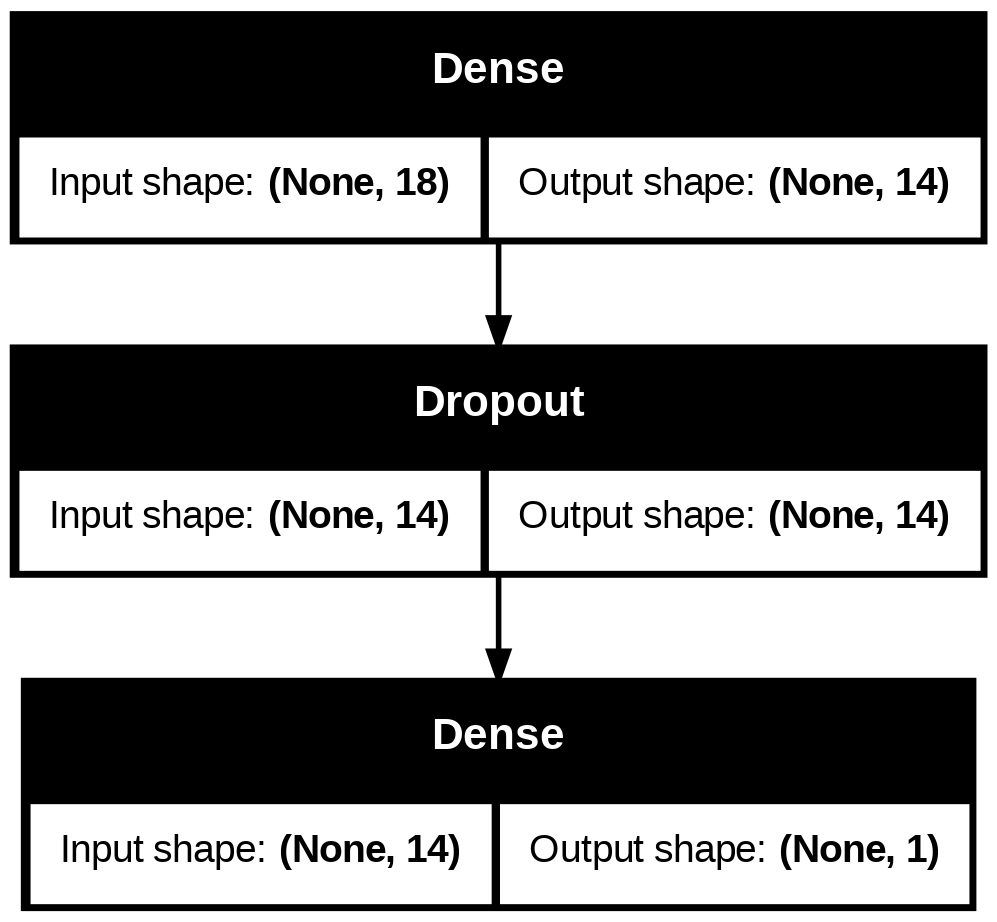

In [ ]:
# Ver como quedo la red
keras.utils.plot_model(best_model, show_shapes=True)

**Entrenar el mejor modelo con 50 epochs**

In [ ]:
# Agregamos Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Entrenar el modelo
history = best_model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7420 - loss: 0.5325 - val_accuracy: 0.7715 - val_loss: 0.4675
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 0.4534 - val_accuracy: 0.7821 - val_loss: 0.4520
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7865 - loss: 0.4331 - val_accuracy: 0.7885 - val_loss: 0.4444
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7883 - loss: 0.4332 - val_accuracy: 0.7942 - val_loss: 0.4367
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7889 - loss: 0.4307 - val_accuracy: 0.7984 - val_loss: 0.4349
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4167 - val_accuracy: 0.7970 - val_loss: 0.4340
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.4226 - val_accuracy: 0.7935 - val_loss: 0.4340
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7827 - loss: 0.4365 - val_accuracy: 0.

# 5. Metricas

Para mejorar un modelo de inteligencia artificial, es crucial medir su rendimiento con precisión. En este contexto, ciertas métricas de evaluación pueden ser decisivas para determinar la eficacia y eficiencia de un modelo. Estas métricas, que van más allá de simples porcentajes de acierto, permiten un análisis más profundo y detallado. Para obtener estos indicadores, normalmente se realiza una matriz de confusión, que nos dará una visión clara de los verdaderos positivos, falsos negativos, falsos positivos, y verdaderos negativos.

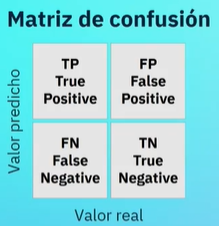

- De la matriz de confusión derivan importantes métricas:

- Accuracy: Define el porcentaje de predicciones correctas: ( (TP + TN) / (TP + TN + FP + FN) ). Es útil en conjuntos de datos balanceados.
- Precision: Evalúa cuántos de los predichos positivos eran realmente positivos: ( TP / (TP + FP) ). Es crucial cuando los falsos positivos causan mucho daño.
- Recall (Sensibilidad): Mide la capacidad del modelo para predecir correctamente los positivos reales: ( TP / (TP + FN) ). Importante cuando los falsos negativos son costosos.
- F1-Score: Es la media armónica entre Precision y Recall, adecuado para conjuntos de datos desbalanceados.

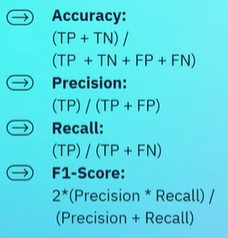

Estas métricas proporcionan una visión integral del desempeño del modelo, permitiendo ajustar estrategias conforme la necesidad del caso.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


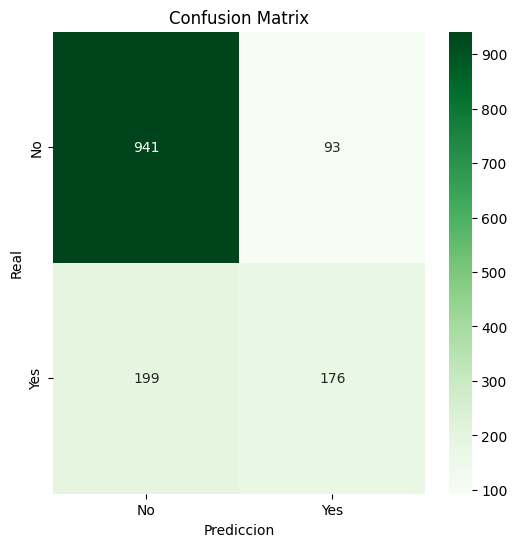

In [ ]:
# Generar la matriz de confusion

y_pred = (model.predict(xtest) > 0.5) # Convertir las probabilidades a 0 o 1 - el umbral sirve para que despues de 0.5 se convierta en 1
cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

In [ ]:
# Reporte de metricas
report = classification_report(ytest, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1034
         Yes       0.65      0.47      0.55       375

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



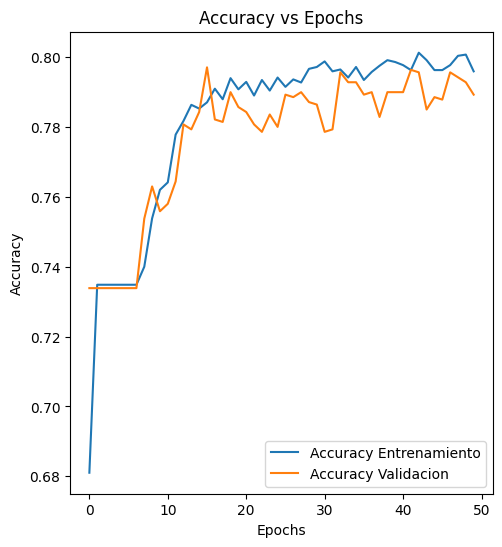

In [ ]:
# Grafica de accuracy

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validacion')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

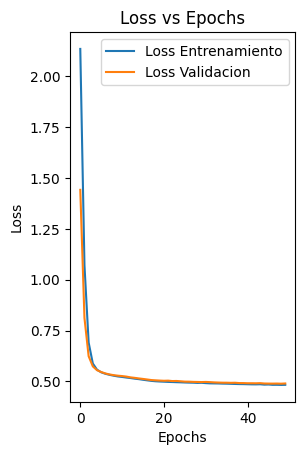

In [ ]:
# Grafica de Loss

# plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validacion')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Curva ROC
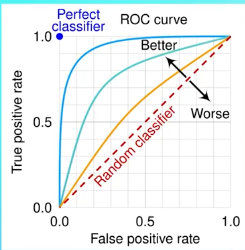

La curva ROC (Receiver Operating Characteristic) permite visualizar el rendimiento de un clasificador binario. Esta gráfica traza la tasa de verdaderos positivos frente a la tasa de falsos positivos, ayudando a evaluar el overfitting o underfitting de un modelo. Un clasificador perfecto alcanzaría un área bajo la curva (AUC) de 1. Un mayor AUC indica un mejor desempeño del modelo.

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


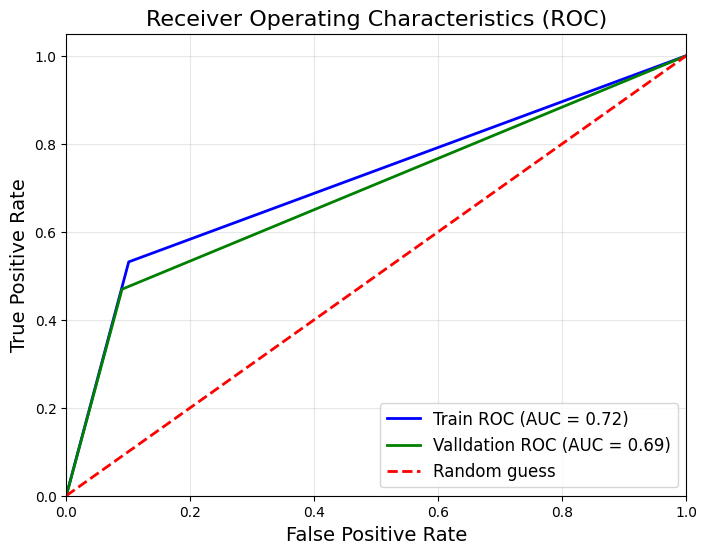

In [ ]:
# Obtener las predicciones de probabilidades
y_pred_train = (model.predict(xtrain) > 0.5) #Convertir las probabilidades a 0 o 1

# Calcular las metricas de la curva ROC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(ytrain, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las metricas de la curva ROC para validacion
fpr_val, tpr_val, _ = roc_curve(ytest, y_pred)
roc_auc_val = auc(fpr_val, tpr_val)

# Graficar ambdas curvas
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2,label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='GREEN', lw=2,label=f'ValIdation ROC (AUC = {roc_auc_val:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristics (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El AUC ofrece una manera resumida y numérica de juzgar el rendimiento del clasificador: cuanto más cerca de 1, mejor es el modelo. Si observamos que el entrenamiento y la prueba de validación tienen curvas ROC muy similares, indica que es un modelo robusto, posiblemente listo para su implementación en el mundo real.

Con este conocimiento, podemos evaluar y mejorar eficazmente los modelos de IA, analizando con confianza su capacidad predictiva e implementando ajustes necesarios para adaptarse mejor a las necesidades de cada proyecto

* En este caso al ser las dos lineas medio juntas y al estar en valores cercanos a 1, nos dice que es un modelo que esta listo para salir al mundo real.

# 5.1 Metricas para el mejor modelo

Ahora las metricas son para el mejor modelo

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


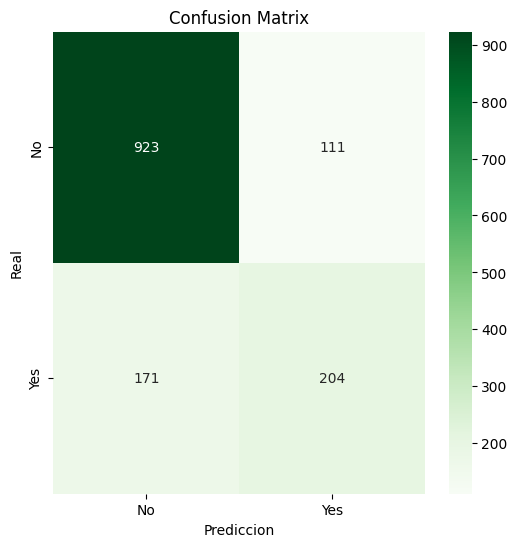

In [ ]:
# Generar la matriz de confusion

y_pred = (best_model.predict(xtest) > 0.5) # Convertir las probabilidades a 0 o 1 - el umbral sirve para que despues de 0.5 se convierta en 1
cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

In [ ]:
# Reporte de metricas
report = classification_report(ytest, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1034
         Yes       0.65      0.54      0.59       375

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



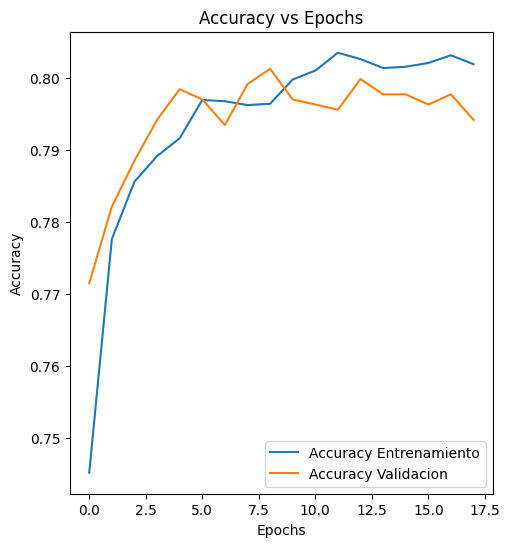

In [ ]:
# Grafica de accuracy

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validacion')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

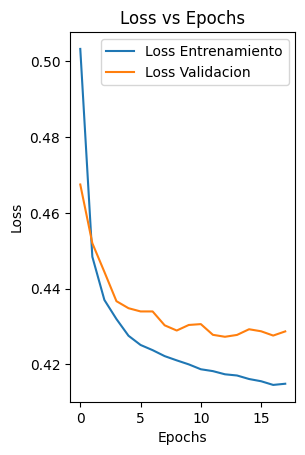

In [ ]:
# Grafica de Loss

# plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validacion')
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Curva ROC
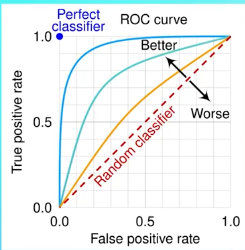

La curva ROC (Receiver Operating Characteristic) permite visualizar el rendimiento de un clasificador binario. Esta gráfica traza la tasa de verdaderos positivos frente a la tasa de falsos positivos, ayudando a evaluar el overfitting o underfitting de un modelo. Un clasificador perfecto alcanzaría un área bajo la curva (AUC) de 1. Un mayor AUC indica un mejor desempeño del modelo.

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


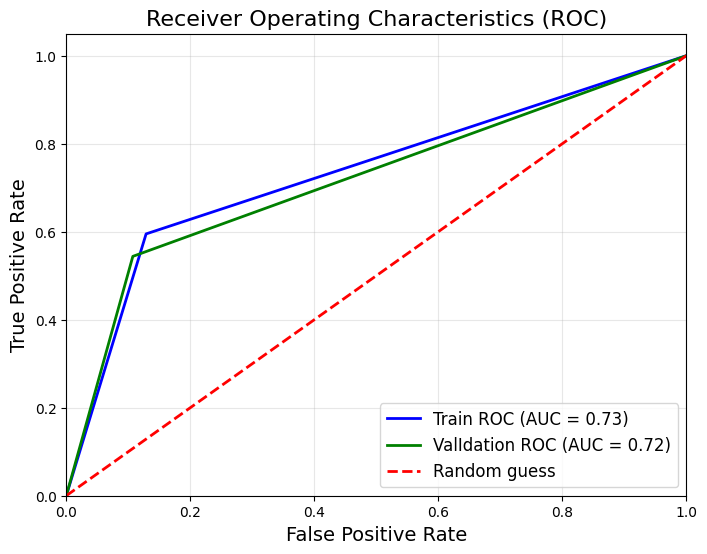

In [ ]:
# Obtener las predicciones de probabilidades
y_pred_train = (best_model.predict(xtrain) > 0.5) #Convertir las probabilidades a 0 o 1

# Calcular las metricas de la curva ROC para entrenamiento
fpr_train, tpr_train, _ = roc_curve(ytrain, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular las metricas de la curva ROC para validacion
fpr_val, tpr_val, _ = roc_curve(ytest, y_pred)
roc_auc_val = auc(fpr_val, tpr_val)

# Graficar ambdas curvas
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2,label=f'Train ROC (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, color='GREEN', lw=2,label=f'ValIdation ROC (AUC = {roc_auc_val:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristics (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El AUC ofrece una manera resumida y numérica de juzgar el rendimiento del clasificador: cuanto más cerca de 1, mejor es el modelo. Si observamos que el entrenamiento y la prueba de validación tienen curvas ROC muy similares, indica que es un modelo robusto, posiblemente listo para su implementación en el mundo real.

Con este conocimiento, podemos evaluar y mejorar eficazmente los modelos de IA, analizando con confianza su capacidad predictiva e implementando ajustes necesarios para adaptarse mejor a las necesidades de cada proyecto

* En este caso al ser las dos lineas medio juntas y al estar en valores cercanos a 1, nos dice que es un modelo que esta listo para salir al mundo real.

# 6. Guardar el modelo

Esto se hace con el objetivo de que sea algo funcional y no se tenga que entrenar una y otra vez cada vez que cambie alguito.

In [ ]:
# Guardar el modelo en formato HDF5
best_model.save('modelo_entrenado.keras')

# 7. Hacer predicciones en produccion

Esto ya con el modelo guardado, y produccion se refiere a que se integre el modelo a una API, una función o a una interfaz grafica, etc.

In [ ]:
import joblib
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# Cargar el modelo una vez (al inicio de la app)
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scale.pkl')

# Cargar el modelo entrenado
model = load_model('modelo_entrenado.keras', compile=False)

In [ ]:
# Funcion para prediccion / inferencia

# Función para preprocesar datos con los objetos guardados (lo mismo de antes del preprocesamiento, se tiene que hacer aca)
def preprocess_data(df):
    # Eliminar columnas irrelevantes
    df = df.drop(['customerID', 'gender'], axis=1, errors='ignore')

    # Reemplazar valores "Yes"/"No" por 1/0
    categorical_columns = list(df.select_dtypes(include='O').keys())
    for i in categorical_columns:
        df[i] = df[i].replace('Yes', 1)
        df[i] = df[i].replace('No', 0)

    # Aplicar Label Encoding usando los objetos guardados -> aca se resalta que si llega algun dato nuevo salte error, eso le da robustez al modelo
    for col, le in label_encoders.items():
        if col in df.columns:
            # Asegurar que los valores sean cadenas antes de la transformación
            df[col] = df[col].astype(str)
            try:
                df[col] = le.transform(df[col])
            except ValueError as e:
                raise ValueError(
                    f"Error al transformar la columna '{col}'. "
                    f"Asegúrate de que los valores en los nuevos datos coincidan con los datos de entrenamiento. "
                    f"Detalles: {e}"
                )

    # Aplicar escalado usando el scaler guardado
    scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    df[scale_cols] = scaler.transform(df[scale_cols])

    return df

In [ ]:
# Formato para generar la prediccion (como formato para generar instancias)

def make_prediction(single_case):
  # Convertir el caso único en DataFrame
  single_case_df = pd.DataFrame(single_case)

  # Preprocesar el caso único
  processed_single_case = preprocess_data(single_case_df)

  # Separar las características del target si aplica
  X_single_case = processed_single_case.drop('Churn', axis=1, errors='ignore')

  # Realizar predicción
  prediction = model.predict(X_single_case)

  score = prediction[0][0] * 100
  print(f"Probabilidad que abandone: {score:.2f} %")

  prediction_binary = (prediction > 0.5).astype(int)
  print("Churn: ", prediction_binary[0][0])

In [ ]:
# Ejemplos de uso

# Churn: Yes / 1 -> esto es lo que se espera
single_case = {
    "customerID": ["9237-HQITU"],
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [2],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["Fiber optic"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["No"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [70.70],
    "TotalCharges": [151.65],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Probabilidad que abandone: 63.87 %
Churn:  1


In [ ]:
# Churn: No / 0
single_case = {
    "customerID": ["7795-CFOCW"],
    "gender": ["Male"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [45],
    "PhoneService": ["No"],
    "MultipleLines": ["No phone service"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["Yes"],
    "OnlineBackup": ["No"],
    "DeviceProtection": ["Yes"],
    "TechSupport": ["Yes"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["One year"],
    "PaperlessBilling": ["No"],
    "PaymentMethod": ["Bank transfer (automatic)"],
    "MonthlyCharges": [42.30],
    "TotalCharges": [1840.75],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Probabilidad que abandone: 4.65 %
Churn:  0


In [ ]:
# Churn: No / 0 -> este caso esta al borde e incluso en algunos casos da un error de prediccion, hay que tener cuidado
single_case = {
    "customerID": ["7590-VHVEG"],
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["Yes"],
    "Dependents": ["No"],
    "tenure": [1],
    "PhoneService": ["No"],
    "MultipleLines": ["No phone service"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [29.85],
    "TotalCharges": [29.85],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probabilidad que abandone: 63.44 %
Churn:  1


In [ ]:
# Churn: Yes / 1 -> aca da error en este caso
single_case = {
    "customerID": ["3668-QPYBK"],
    "gender": ["Male"],
    "SeniorCitizen": [0],
    "Partner": ["No"],
    "Dependents": ["No"],
    "tenure": [2],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["Yes"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Mailed check"],
    "MonthlyCharges": [53.85],
    "TotalCharges": [108.15],
}

make_prediction(single_case)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Probabilidad que abandone: 28.15 %
Churn:  0


# Bonus: Monitoreo y Visualización de Modelos Deep Learning con TensorBoard

TensorBoard es una herramienta esencial en el mundo del deep learning. Nos permite seguir métricas clave, como loss y accuracy, durante el entrenamiento de los modelos.



```
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="logs")

history = model.fit(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest), callbacks=[tensorboard_callback])
```

- Para configurar TensorBoard en tu proyecto, primero importamos la clase. Luego, creamos una instancia llamada tensorboard_callback.
- Especificamos el directorio de registro que almacenará los datos generados durante el entrenamiento.
- Finalmente, entrenamos nuestro modelo.

* Lo más importante es que incluimos nuestro tensorboard_callback en la lista de callbacks. Esto asegura que durante el entrenamiento, se registren las métricas y se guarden en el directorio.





```
tensorboard --logdir=logs

```
Después del entrenamiento de tu modelo, puedes acceder a TensorBoard ejecutando el siguiente comando en la terminal.

----

```
%load_ext tensorboard
%tensorboard --logdir logs

```
Si estás trabajando en Google Colab, puedes integrar TensorBoard fácilmente. Esto es especialmente útil para proyectos colaborativos o cuando no tienes acceso a un entorno local robusto.

- Durante el entrenamiento y la validación, los valores de loss y accuracy varían en cada epoch; esto se puede observar en los paneles Time Series y Scalars.

- Monitorear estas métricas es crucial para evitar el overfitting, ya que permite identificar cuándo el modelo se adapta demasiado a los datos de entrenamiento y pierde capacidad de generalización.

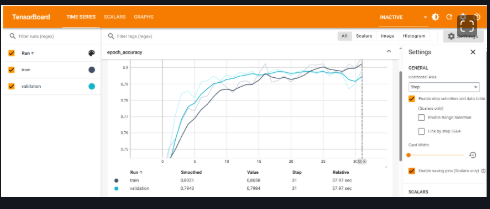

-----

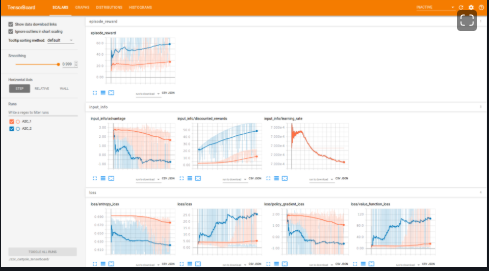

El panel Graphs Dashboard es altamente interactivo, ya que permite visualizar la estructura del grafo de computación de la red neuronal. Esto facilita la identificación de cuellos de botella o errores en la arquitectura.

----------

La interactividad de TensorBoard te permite analizar histogramas de activaciones y pesos, así como visualizar la arquitectura completa de tu modelo. Sin embargo, es importante tener en cuenta que, con grandes volúmenes de datos, TensorBoard puede volverse lento, lo que podría afectar su eficiencia en proyectos de gran escala.

- Usar TensorBoard no solo es útil por su integración con TensorFlow, sino que también te permite practicar y mejorar tus habilidades en el desarrollo de modelos de deep learning.

Entrenamiento y visualizacion con TensorBoard: https://drive.google.com/file/d/1uj1Xwis7AoMM4dq64x59-KYwHZ6Fc0m5/view



# Optimizadores

Los optimizadores son herramientas cruciales en el entrenamiento de redes neuronales, ya que ayudan a ajustar los pesos y los sesgos del modelo. De esta manera, las predicciones mejoran a lo largo del proceso de entrenamiento. El optimizador controla cómo y qué tan rápido el modelo aprende.

Los optimizadores ayudan a reducir tiempos de entrenamiento y también a hacer un mejor uso de los recursos disponibles. En resumen, optimizadores destacan por:

* Ajuste de pesos y sesgos para mejorar predicciones.
* Control del aprendizaje durante el entrenamiento.
* Reducción de tiempos de entrenamiento y ahorro de recursos.

### Cuales son los optmizadores mas populares?:

1. SGD (Stochastic Gradient Descent) -> Ideal para tareas simples o cuando se busca mayor control manual del proceso.

2. RMSProp -> Preferido en redes recurrentes o en tareas donde los gradientes cambian drásticamente.

3. Adam -> Funciona en la mayoría de los casos, fácil y práctico de manejar con poca configuración.

4. AdamW -> Variante de Adam, utilizada en modelos complejos y grandes, o cuando se necesita regularización.
----------

###¿Cómo implementar un optimizador en el código?
Para implementar un optimizador, debemos definirlo dentro de la sección de compilación del modelo.

# Early Stopping
Entrenar un modelo de machine learning es una tarea delicada que implica ajustar parámetros de forma adecuada para lograr un rendimiento óptimo. Un término común que enfrentan los científicos de datos es el overfitting, donde un modelo se ajusta demasiado a los datos de entrenamiento, perdiendo así su capacidad de generalizar a nuevos datos.
- Una técnica efectiva para prevenir el overfitting es el early stopping, que también ayuda a conservar recursos y tiempo. Exploraremos cómo implementar esta técnica junto con el optimizador AdamW en modelos de aprendizaje automático.

----

La técnica de early stopping se centra en detener el entrenamiento de un modelo antes de que comiencen a ocurrir problemas de ajuste inadecuado. Esto se logra estando atentos a una métrica de monitoreo, como el valor de pérdida (loss) durante la etapa de validación:

- Monitoreo de métricas específicas: En este caso, se supervisa de cerca el valor de loss en la etapa de validación.
- Paciencia: Se introduce un parámetro de paciencia, en este ejemplo, fijado en cinco epochs. Si el valor de la métrica no mejora en este lapso, el proceso de entrenamiento se detiene automáticamente.
- Optimización de recursos: Al devolver los mejores pesos capturados durante el entrenamiento, se asegura que se mantenga el modelo más óptimo generado durante el proceso.

----

### ¿Cómo implementar early stopping con AdamW?
Para aplicar esta técnica en la práctica, uno puede ajustar el número de epochs al configurar el entrenamiento. Por ejemplo, al definir cincuenta epochs y ejecutar el callback de early stopping, el modelo observará el comportamiento de la métrica y decidirá si finaliza antes de lo previsto. De este modo, en un ejemplo concreto, el entrenamiento podría durar solamente nueve epochs, evitando recorrer todos los cincuenta inicialmente planeados debido a mejoras detenidas.

- Este enfoque de early stopping no solo optimiza el proceso de entrenamiento, sino que también trae consigo la oportunidad de aprender, mejorar y seguir explorando otras técnicas como la regularización

# Regularizadores

Las técnicas avanzadas de regularización son fundamentales para mejorar la calidad de las predicciones en modelos de redes neuronales. En particular, técnicas como Dropout, L1 y L2 son herramientas esenciales para desarrollar modelos más robustos y confiables, especialmente en redes complejas con tendencia al overfitting. Veamos más a fondo cómo cada una de estas técnicas contribuye a la estabilidad y eficiencia de las redes neuronales.

## Dropout

Dropout es una técnica eficaz cuando trabajamos con grandes redes neuronales que suelen sobreajustar los datos de entrenamiento. Al aplicar Dropout, desactivamos aleatoriamente un porcentaje de las neuronas durante el entrenamiento, lo que incrementa la robustez del modelo y previene la dependencia de ciertas neuronas.

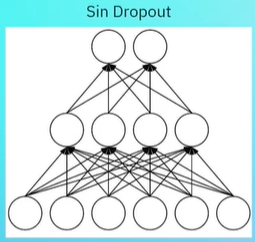

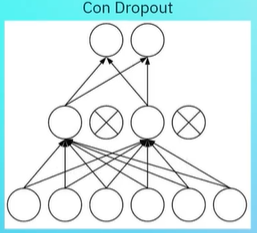

* Ya esta implementado en el codigo pero aca se pone mas especifico:



```
# Ejemplo de implementación de Dropout en una red neuronal
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=64, activation='relu'))
# Añadimos una capa de Dropout con un 30% de desactivación
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

----------

## ¿Cuándo usar L1 y L2, y cuál es su impacto?
L1 y L2 son dos técnicas de regularización que se aplican de manera diferente según las características del modelo.

* L1 Regularization: Se utiliza principalmente cuando existen muchas características de entrada. Ayuda a eliminar pesos innecesarios, simplificando así el modelo.

* L2 Regularization: Aporta gran estabilidad ya que reduce la sensibilidad al ruido en los datos.

* Es posible combinar ambas regularizaciones para aprovechar sus respectivas ventajas. Esta combinación es útil para modelos que requieren tanto simplicidad como estabilidad.

Codigo:

```
# Implementación de L1 y L2 con Keras
from keras.regularizers import l1, l2

model = Sequential()
model.add(Dense(128, input_dim=64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```
--------

Para verificar la efectividad de estas técnicas de regularización, es fundamental analizar las métricas de rendimiento del modelo, como la matriz de confusión, el F1-Score, la precisión (accuracy), y la curva ROC.

* Estas observaciones evidencian cómo las técnicas de regularización pueden extender la capacidad de generalización del modelo, ayudando a evitar el overfitting y estabilizando el proceso de aprendizaje.



# Optimización de Hiperparametros

Optimizar los hiperparámetros de un modelo de machine learning es esencial para lograr un alto rendimiento. Random Search es una técnica que ayuda a explorar diversas configuraciones y encontrar la más adecuada de manera automatizada. Utilizando la librería Keras Tuner, podemos ajustar nuestros modelos de manera efectiva. A continuación, te mostramos cómo implementar este método para redes neuronales en Keras.

-----
## Por qué es importante optimizar los hiperparámetros?

Random Search no solo aumenta la eficiencia en la búsqueda de la mejor configuración, sino que también añade confianza en la toma de decisiones al ser automatizada. Evita el uso de valores arbitrarios y permite realizar ajustes precisos en las capas de la red. Al aplicar técnicas como el dropout, minimizamos el riesgo de sobreajuste, mejorando el rendimiento general del modelo.

Con estrategias de optimización avanzadas, construyes modelos más robustos y reduces el tiempo de entrenamiento al máximo.

# ¿Cómo decidir cuándo actualizar o reentrenar un modelo?

El momento óptimo para actualizar o reentrenar un modelo depende en gran medida de la frecuencia con la que se actualiza el dataset. Algunos criterios a considerar:

- Frecuencia de actualización del dataset: Puede ser semanal, mensual o trimestral.
- Reentrenamiento alineado con las actualizaciones: Si el dataset se actualiza mensualmente, como en nuestro ejemplo, el modelo debería reentrenarse en la misma frecuencia.

Mantener el modelo actualizado garantiza que siga siendo relevante y eficiente en su entorno de aplicación.

Este enfoque hacia la gestión y el mantenimiento de modelos neuronales es clave para sacar el máximo provecho de las capacidades de Machine Learning, asegurando así que estén listos para su despliegue en producción y sean efectivos en tiempo real.